<a href="https://colab.research.google.com/github/MansiiKhandekar/MansiiKhandekar/blob/main/Shopper_Segmentation_and_Cancellation_Prediction_on_Amazon_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project uses real Amazon order data to understand customer behavior and predict cancellations. It combines clustering and classification to deliver powerful business insights.

What This Project Does:

Segments shoppers using K-Means clustering

Predicts order cancellations using Random Forest

Cleans and prepares real-world data with features like:

Price per item

Promo usage

Order day/month

Fulfilment type

Product category



Key Outcomes:
Identified customer types like Promo Hunters, Bulk Buyers, and Impulse Shoppers

Built a model to flag high-risk orders before they get cancelled

Visualized patterns and key features driving customer actions

Why It Matters:
This notebook shows how machine learning can improve e-commerce strategy — from marketing to operations. It's a full pipeline from raw data to business-ready insights.



In [5]:
from google.colab import files
f=files.upload


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd                                   #importing and loading data
df=pd.read_csv('/content/Amazon Sale Report.csv')

/tmp/ipython-input-7-3946958860.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/Amazon Sale Report.csv')


In [8]:
df=pd.DataFrame(df)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [9]:
df.columns            #start of data preprocessing

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [10]:
df.drop(columns=['index','Order ID','Sales Channel ','Size','ASIN','Courier Status','Unnamed: 22'],axis=1)

,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,05-31-22,Shipped,Amazon,Expedited,JNE3697,JNE3697-KR-XL,kurta,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN
128971,05-31-22,Shipped,Amazon,Expedited,SET401,SET401-KR-NP-M,Set,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
128972,05-31-22,Shipped,Amazon,Expedited,J0157,J0157-DR-XXL,Western Dress,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN
128973,05-31-22,Shipped,Amazon,Expedited,J0012,J0012-SKD-XS,Set,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


In [11]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [12]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [13]:
df.dropna(subset=['Amount'], inplace=True)
df.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'], inplace=True)
df['is_promotion_used'] = df['promotion-ids'].notnull().astype(int)
df['fulfilled-by'].fillna('Unknown', inplace=True)

/tmp/ipython-input-13-3437607036.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fulfilled-by'].fillna('Unknown', inplace=True)


In [14]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [15]:
df.drop(columns=['promotion-ids'],inplace=True)

In [16]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Unnamed: 22,is_promotion_used
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,0
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,1
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Unknown,NaN,1
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,0
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Unknown,NaN,0


In [17]:
df['Date'] = pd.to_datetime(df['Date'], format="%m-%d-%y", errors='coerce')
df['order_month'] = df['Date'].dt.month
df['order_day'] = df['Date'].dt.day
df['price_per_item'] = df['Amount'] / df['Qty'].replace(0, 1)
df['is_cancelled'] = df['Status'].str.contains('Cancelled', case=False).astype(int)

In [18]:
df['weekend_flag'] = df['Date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

In [19]:
df['Status'].unique()
df['is_cancelled'] = df['Status'].str.contains('Cancelled', case=False).astype(int)
df.drop('Status',axis=1,inplace=True)

In [20]:
df.drop(columns=['Style', 'SKU', 'currency'], inplace=True)
df=pd.get_dummies(df,columns=['Fulfilment', 'ship-service-level', 'Category'], drop_first=True)

In [21]:
df['fulfilled-by'].unique()

array(['Easy Ship', 'Unknown'], dtype=object)

In [22]:
df['fulfilled_by_easyship'] = (df['fulfilled-by'] == 'Easy Ship').astype(int)
df.drop('fulfilled-by',axis=1,inplace=True)

In [23]:
df

,index,Order ID,Date,Sales Channel,Size,ASIN,Courier Status,Qty,Amount,ship-city,...,ship-service-level_Standard,Category_Bottom,Category_Dupatta,Category_Ethnic Dress,Category_Saree,Category_Set,Category_Top,Category_Western Dress,Category_kurta,fulfilled_by_easyship
0,0,405-8078784-5731545,2022-04-30,Amazon.in,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,...,True,False,False,False,False,True,False,False,False,1
1,1,171-9198151-1101146,2022-04-30,Amazon.in,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,...,True,False,False,False,False,False,False,False,True,1
2,2,404-0687676-7273146,2022-04-30,Amazon.in,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,...,False,False,False,False,False,False,False,False,True,0
3,3,403-9615377-8133951,2022-04-30,Amazon.in,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,...,True,False,False,False,False,False,False,True,False,1
4,4,407-1069790-7240320,2022-04-30,Amazon.in,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,...,False,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Amazon.in,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,...,False,False,False,False,False,False,False,False,True,0
128971,128971,402-9551604-7544318,2022-05-31,Amazon.in,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,...,False,False,False,False,False,True,False,False,False,0
128972,128972,407-9547469-3152358,2022-05-31,Amazon.in,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,...,False,False,False,False,False,False,False,True,False,0
128973,128973,402-6184140-0545956,2022-05-31,Amazon.in,XS,B0894Y2NJQ,Shipped,1,1199.00,Halol,...,False,False,False,False,False,True,False,False,False,0


In [24]:
bools = df.select_dtypes(include=['bool']).columns
df[bools] = df[bools].astype(int)

In [25]:
df.drop(columns=['ship-city','ship-state'],axis=1,inplace=True)

In [26]:
df.columns

Index(['index', 'Order ID', 'Date', 'Sales Channel ', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-postal-code', 'ship-country',
       'B2B', 'Unnamed: 22', 'is_promotion_used', 'order_month', 'order_day',
       'price_per_item', 'is_cancelled', 'weekend_flag', 'Fulfilment_Merchant',
       'ship-service-level_Standard', 'Category_Bottom', 'Category_Dupatta',
       'Category_Ethnic Dress', 'Category_Saree', 'Category_Set',
       'Category_Top', 'Category_Western Dress', 'Category_kurta',
       'fulfilled_by_easyship'],
      dtype='object')

In [27]:
df.drop(columns=['ship-postal-code','ship-country'], inplace=True)

In [28]:
features = [                                   #creating clusters
    'Qty',
    'Amount',
    'price_per_item',
    'is_promotion_used',
    'B2B',
    'order_month',
    'order_day',
    'weekend_flag',
    'fulfilled_by_easyship',
    'Fulfilment_Merchant',
    'ship-service-level_Standard',
    'Category_kurta',
    'Category_Saree',
    'Category_Top',
    'Category_Set'
]

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(df[features])

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['shopper_cluster'] = kmeans.fit_predict(X_scaled)

In [31]:
df.groupby('shopper_cluster')[features].mean()

,Qty,Amount,price_per_item,is_promotion_used,B2B,order_month,order_day,weekend_flag,fulfilled_by_easyship,Fulfilment_Merchant,ship-service-level_Standard,Category_kurta,Category_Saree,Category_Top,Category_Set
shopper_cluster,,,,,,,,,,,,,,,
0,1.004143,848.651419,845.435559,0.655399,0.006986,4.926094,14.786837,0.299252,0.000833,0.000833,0.001569,0.004633,0.000000,0.000000,0.791960
1,1.004568,538.100114,535.575561,0.494607,0.006344,4.878822,15.240452,0.309605,0.006852,0.006852,0.014465,0.000000,0.015734,0.984266,0.000000
2,0.865808,645.571614,644.013266,0.861508,0.007559,4.851064,15.532680,0.293517,1.000000,1.000000,1.000000,0.363338,0.000828,0.064265,0.374770
3,1.003539,443.653308,442.153365,0.472941,0.006422,4.959297,14.393589,0.294257,0.000029,0.000029,0.023606,0.939316,0.000000,0.000000,0.019752


Cluster 0 = highest promo usage, lowest price → Promo Hunters

Cluster 1 = High qty + price → Bulk Buyers

Cluster 2 = Low qty, moderate price → Regular Loyalists

Cluster 3 = Buys on weekends only → Impulse Shoppers

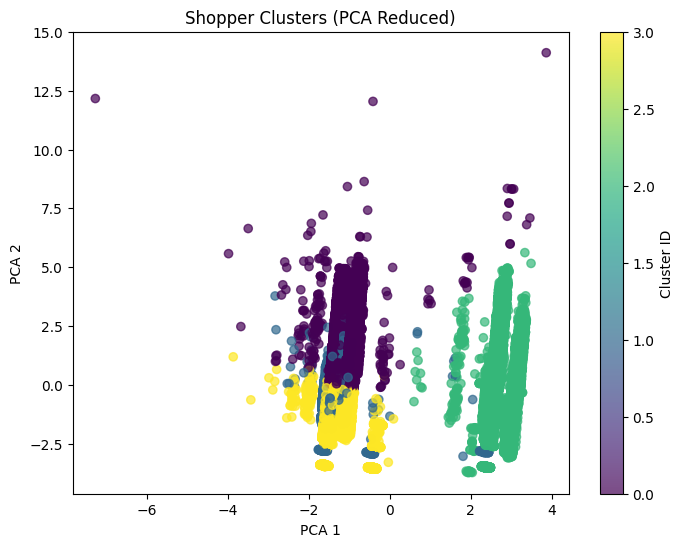

In [32]:
from sklearn.decomposition import PCA #visualising clusters
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['shopper_cluster'], cmap='viridis', alpha=0.7)
plt.title("Shopper Clusters (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster ID")
plt.show()


In [33]:
df.columns

Index(['index', 'Order ID', 'Date', 'Sales Channel ', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'B2B', 'Unnamed: 22',
       'is_promotion_used', 'order_month', 'order_day', 'price_per_item',
       'is_cancelled', 'weekend_flag', 'Fulfilment_Merchant',
       'ship-service-level_Standard', 'Category_Bottom', 'Category_Dupatta',
       'Category_Ethnic Dress', 'Category_Saree', 'Category_Set',
       'Category_Top', 'Category_Western Dress', 'Category_kurta',
       'fulfilled_by_easyship', 'shopper_cluster'],
      dtype='object')

In [34]:
features_class = [                     #predicting if the order will get cancelled using random forest classified on the column 'is_canceled'
    'Qty', 'Amount', 'price_per_item', 'B2B', 'is_promotion_used',
    'order_month', 'order_day', 'weekend_flag',
    'Fulfilment_Merchant', 'ship-service-level_Standard',
    'Category_Bottom', 'Category_Ethnic Dress', 'Category_Saree',
    'Category_Set', 'Category_Top', 'Category_Western Dress',
    'Category_kurta', 'fulfilled_by_easyship'
]

In [35]:
X=df[features_class]
y = df['is_cancelled']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rc= RandomForestClassifier(n_estimators=100, random_state=42)
rc.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
!pip install -U scikit-learn         #sklearn.metrics not found so reinstalling s


In [41]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
y_pred= rc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     22040
           1       0.77      0.57      0.65      2190

    accuracy                           0.95     24230
   macro avg       0.87      0.78      0.81     24230
weighted avg       0.94      0.95      0.94     24230



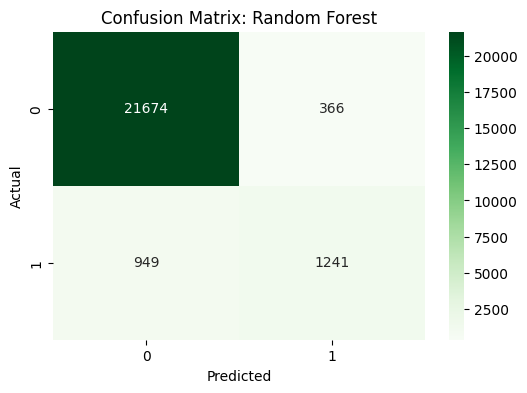

In [42]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [44]:
y_prob = rc.predict_proba(X_test)[:, 1]

Roc Score:  0.9219099250843216


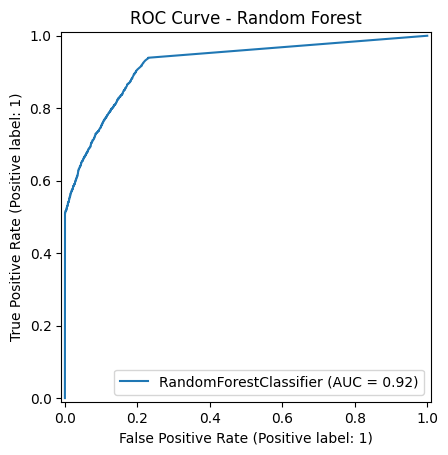

In [46]:
roc_score = roc_auc_score(y_test, y_prob)
print("Roc Score: ", roc_score)
RocCurveDisplay.from_estimator(rc, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()